In [1]:
# import all necessary libraries

import geopandas as gpd
import xarray
from shapely.geometry import mapping

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

import pandas as pd
from datetime import datetime

import os

from sklearn.metrics import mean_squared_error

In [2]:
# import MDB boundary
MDB_path = 'ERA5-Land/MDBBND/mdb_boundary.shp'
MDB_shape = gpd.read_file(MDB_path)

In [3]:
# import Australian river regions data from Digital Atlas
sub_basins_path = 'MurrayDarling_Subbasins/Digital_Atlas/RiverRegionWebM/RiverRegionWebM.shp'
sub_basins_shape = gpd.read_file(sub_basins_path)

In [4]:
# convert to consistent CRS
MDB_shape = MDB_shape.to_crs(epsg=4326, inplace=False)
sub_basins_shape = sub_basins_shape.to_crs(epsg=4326, inplace=False)

In [5]:
# filter Australian river regions only within MDB

MDB_sub_basins = sub_basins_shape[sub_basins_shape["division"] == "Murray-Darling Basin"]
MDB_sub_basins

,hydroid,division,rivregname,srcfcname,srcftype,srctype,sourceid,featrel,fsource,attrrel,attrsource,planacc,symbol,textnote,globalid,rivregnum,albersarea,geometry
150,43637136,Murray-Darling Basin,UPPER MURRAY RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,6f71368f-e37a-42ad-b00a-b67b50ab0693,1,1.533339e+10,"MULTIPOLYGON (((148.33709 -35.97957, 148.33764..."
151,43637137,Murray-Darling Basin,KIEWA RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,632d37fd-d173-4ae8-8035-7c04ac32f30a,2,1.712153e+09,"POLYGON ((147.20376 -36.91846, 147.20376 -36.9..."
152,43637138,Murray-Darling Basin,OVENS RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,1f16636f-89f0-4935-9ead-ca05cef6bebd,3,6.449535e+09,"MULTIPOLYGON (((146.61709 -36.26901, 146.61709..."
153,43637139,Murray-Darling Basin,BROKEN RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,87badfeb-da77-475b-92af-273d4684fb5e,4,6.488783e+09,"MULTIPOLYGON (((146.10709 -36.07679, 146.10903..."
154,43637140,Murray-Darling Basin,GOULBURN RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,0c28a285-701c-4113-b940-5b439ccd99ee,5,1.710459e+10,"MULTIPOLYGON (((144.75542 -36.89485, 144.75542..."
155,43637141,Murray-Darling Basin,CAMPASPE RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,19a20d5d-7dd1-46e5-8586-40e15f3d8a8e,6,3.815816e+09,"MULTIPOLYGON (((144.76931 -36.28457, 144.76931..."
156,43637156,Murray-Darling Basin,LODDON RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,e7e0f7b5-e6da-4e69-b88a-a08520885ec1,7,1.575027e+10,"MULTIPOLYGON (((144.53820 -36.63040, 144.53820..."
157,43637155,Murray-Darling Basin,AVOCA RIVER,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,b91c89fb-c8bd-46ab-bfbb-37ad7f08b3d3,8,4.005346e+09,"MULTIPOLYGON (((143.43459 -35.95124, 143.43459..."
158,43637157,Murray-Darling Basin,AVON RIVER-TYRELL LAKE,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,a86a1dc4-3d3e-4569-ae47-238b6cbc1c80,9,1.215093e+10,"MULTIPOLYGON (((143.27042 -35.07818, 143.27070..."
159,43637142,Murray-Darling Basin,MURRAY RIVERINA,NaN,NaN,0,0,2019-08-21,Bureau of Meteorology,2019-08-21,Bureau of Meteorology,15,0,NaN,4ddec5b1-cd8e-4546-862a-25b73efbb3ba,10,1.893370e+10,"MULTIPOLYGON (((145.28681 -35.85790, 145.28598..."


Note: The boundaries of the MDB Shapefile and Sub_Basin Shapefile do not match

See below

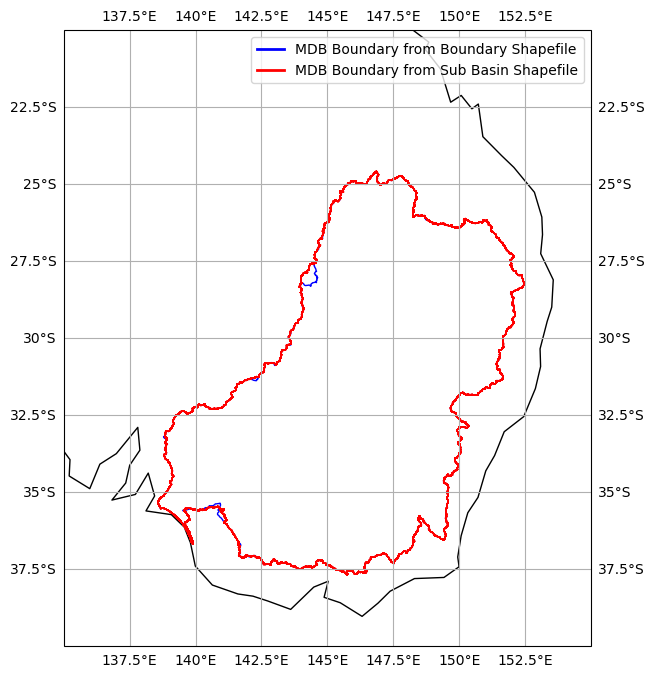

In [6]:
MDB_sub_basins_region = MDB_sub_basins.dissolve()

# Create the figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the MDB boundary from the boundary shapefile
MDB_shape.boundary.plot(ax=ax, color='blue', linewidth=1)

# Plot the MDB boundary from the sub-basin shapefile
MDB_sub_basins_region.boundary.plot(ax=ax, color='red', linewidth=1)

# Add coastlines for context
ax.coastlines(resolution='110m', color='black', linewidth=1)

# Set map extent (bounding box)
ax.set_extent([135, 155, -40, -20])

# Add gridlines with labels
ax.gridlines(draw_labels=True)

# Manually create legend handles
import matplotlib.lines as mlines  

legend_handles = [
    mlines.Line2D([], [], color='blue', linewidth=2, label="MDB Boundary from Boundary Shapefile"),
    mlines.Line2D([], [], color='red', linewidth=2, label="MDB Boundary from Sub Basin Shapefile")
]
ax.legend(handles=legend_handles, loc='upper right')

# Show the plot
plt.show()

### MDB Subbasins

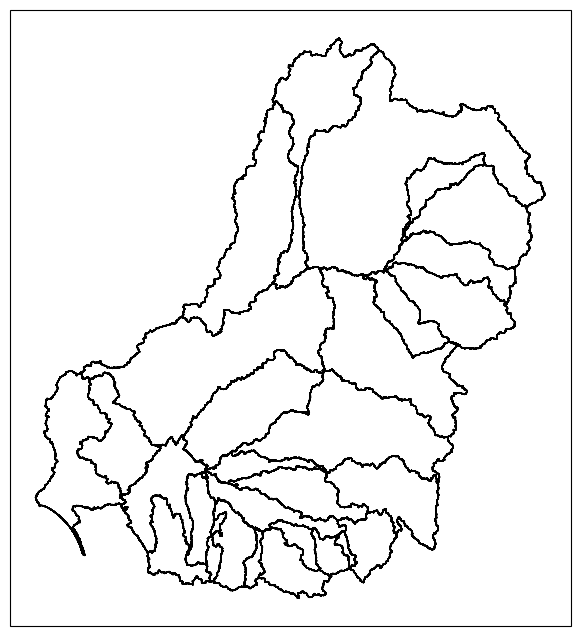

In [7]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
MDB_sub_basins.boundary.plot(ax=ax, color='black', linewidth=1)
plt.show()

## Defining north and south regions

In [8]:
MDB_sub_basins["region"] = None

C:\Users\arfaa\anaconda3\envs\spanalytics\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
print(MDB_sub_basins["rivregname"].sort_values())

157                AVOCA RIVER
158     AVON RIVER-TYRELL LAKE
163    BENANEE-WILLANDRA CREEK
160     BILLABONG-YANCO CREEKS
166              BORDER RIVERS
153               BROKEN RIVER
155             CAMPASPE RIVER
170          CASTLEREAGH RIVER
178    CONDAMINE-CULGOA RIVERS
174              DARLING RIVER
154             GOULBURN RIVER
168               GWYDIR RIVER
151                KIEWA RIVER
162              LACHLAN RIVER
156               LODDON RIVER
175               LOWER MALLEE
176         LOWER MURRAY RIVER
171     MACQUARIE-BOGAN RIVERS
167               MOONIE RIVER
159            MURRAY RIVERINA
161         MURRUMBIDGEE RIVER
169                NAMOI RIVER
152                OVENS RIVER
173                PAROO RIVER
165               UPPER MALLEE
150         UPPER MURRAY RIVER
172              WARREGO RIVER
164              WIMMERA RIVER
Name: rivregname, dtype: object


In [10]:
north_rivers = ["WARREGO RIVER", "PAROO RIVER", "CONDAMINE-CULGOA RIVERS", "MOONIE RIVER", "BORDER RIVERS", "GWYDIR RIVER", "NAMOI RIVER", "DARLING RIVER","MACQUARIE-BOGAN RIVERS", "CASTLEREAGH RIVER"]
south_rivers = ["WIMMERA RIVER", "LODDON RIVER", "AVOCA RIVER", "LOWER MURRAY RIVER", "UPPER MURRAY RIVER", "GOULBURN RIVER", "BROKEN RIVER", "KIEWA RIVER", "OVENS RIVER", "CAMPASPE RIVER", "LOWER MALLEE", "UPPER MALLEE", "AVON RIVER-TYRELL LAKE", "MURRUMBIDGEE RIVER", "MURRAY RIVERINA", "LACHLAN RIVER", "BILLABONG-YANCO CREEKS", "BENANEE-WILLANDRA CREEK"]

In [11]:
MDB_sub_basins.loc[MDB_sub_basins["rivregname"].isin(north_rivers), "region"] = "North"
MDB_sub_basins.loc[MDB_sub_basins["rivregname"].isin(south_rivers), "region"] = "South"

In [12]:
MDB_sub_basins_north = MDB_sub_basins[MDB_sub_basins["region"] == "North"]
MDB_sub_basins_south = MDB_sub_basins[MDB_sub_basins["region"] == "South"]

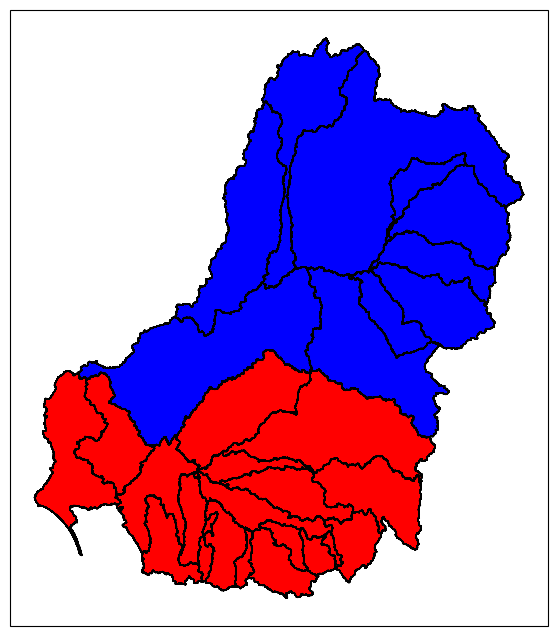

In [13]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
MDB_sub_basins.boundary.plot(ax=ax, color='black', linewidth=1)
MDB_sub_basins_north.plot(ax=ax, color = 'blue', linewidth = 1)
MDB_sub_basins_south.plot(ax=ax, color = 'red', linewidth = 1)
plt.show()

## Defining northeast and northwest regions

In [14]:
MDB_sub_basins_north["subregion"] = None

C:\Users\arfaa\anaconda3\envs\spanalytics\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
print(MDB_sub_basins_north["rivregname"].sort_values())

166              BORDER RIVERS
170          CASTLEREAGH RIVER
178    CONDAMINE-CULGOA RIVERS
174              DARLING RIVER
168               GWYDIR RIVER
171     MACQUARIE-BOGAN RIVERS
167               MOONIE RIVER
169                NAMOI RIVER
173                PAROO RIVER
172              WARREGO RIVER
Name: rivregname, dtype: object


In [16]:
northeast_rivers = ["NAMOI RIVER", "GWYDIR RIVER", "BORDER RIVERS","MOONIE RIVER", "CASTLEREAGH RIVER","MACQUARIE-BOGAN RIVERS","CONDAMINE-CULGOA RIVERS"]
northwest_rivers = ["PAROO RIVER", "DARLING RIVER", "WARREGO RIVER"]

In [17]:
MDB_sub_basins_north.loc[MDB_sub_basins_north["rivregname"].isin(northeast_rivers), "subregion"] = "North East"
MDB_sub_basins_north.loc[MDB_sub_basins_north["rivregname"].isin(northwest_rivers), "subregion"] = "North West"

In [18]:
MDB_sub_basins_northeast = MDB_sub_basins_north[MDB_sub_basins_north["subregion"] == "North East"]
MDB_sub_basins_northwest = MDB_sub_basins_north[MDB_sub_basins_north["subregion"] == "North West"]

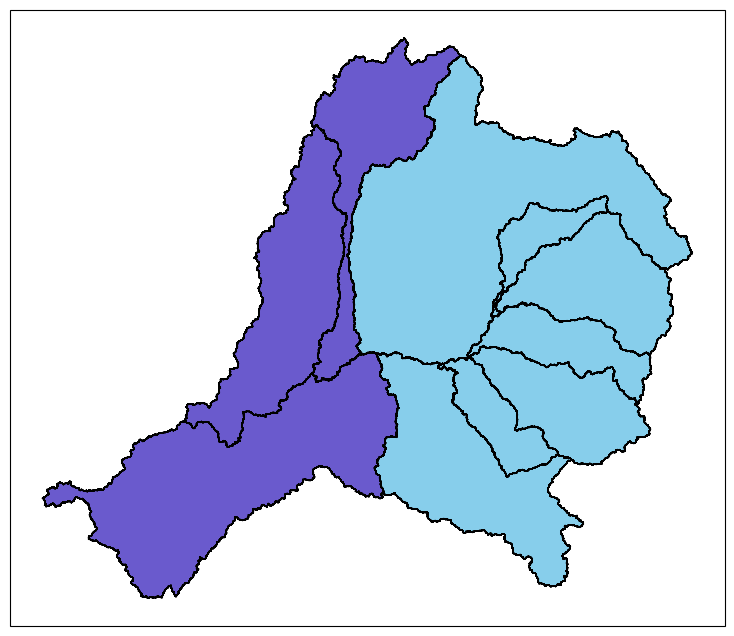

In [19]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
MDB_sub_basins_north.boundary.plot(ax=ax, color='black', linewidth=1)
MDB_sub_basins_northeast.plot(ax=ax, color = 'skyblue', linewidth = 1)
MDB_sub_basins_northwest.plot(ax=ax, color = 'slateblue', linewidth = 1)
plt.show()

## Defining southeast and southwest regions

In [20]:
MDB_sub_basins_south["subregion"] = None

C:\Users\arfaa\anaconda3\envs\spanalytics\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
print(MDB_sub_basins_south["rivregname"].sort_values())

157                AVOCA RIVER
158     AVON RIVER-TYRELL LAKE
163    BENANEE-WILLANDRA CREEK
160     BILLABONG-YANCO CREEKS
153               BROKEN RIVER
155             CAMPASPE RIVER
154             GOULBURN RIVER
151                KIEWA RIVER
162              LACHLAN RIVER
156               LODDON RIVER
175               LOWER MALLEE
176         LOWER MURRAY RIVER
159            MURRAY RIVERINA
161         MURRUMBIDGEE RIVER
152                OVENS RIVER
165               UPPER MALLEE
150         UPPER MURRAY RIVER
164              WIMMERA RIVER
Name: rivregname, dtype: object


In [30]:
southeast_rivers = ["UPPER MURRAY RIVER", "KIEWA RIVER", "OVENS RIVER", "GOULBURN RIVER", "LACHLAN RIVER", "BENANEE-WILLANDRA CREEK", "LODDON RIVER", "CAMPASPE RIVER", "AVOCA RIVER", "BILLABONG-YANCO CREEKS", "MURRAY RIVERINA", "BROKEN RIVER", "MURRUMBIDGEE RIVER"]
southwest_rivers = ["LOWER MURRAY RIVER", "UPPER MALLEE", "LOWER MALLEE", "WIMMERA RIVER", "AVON RIVER-TYRELL LAKE"]

In [31]:
MDB_sub_basins_south.loc[MDB_sub_basins_south["rivregname"].isin(southeast_rivers), "subregion"] = "South East"
MDB_sub_basins_south.loc[MDB_sub_basins_south["rivregname"].isin(southwest_rivers), "subregion"] = "South West"

In [32]:
MDB_sub_basins_southeast = MDB_sub_basins_south[MDB_sub_basins_south["subregion"] == "South East"]
MDB_sub_basins_southwest = MDB_sub_basins_south[MDB_sub_basins_south["subregion"] == "South West"]

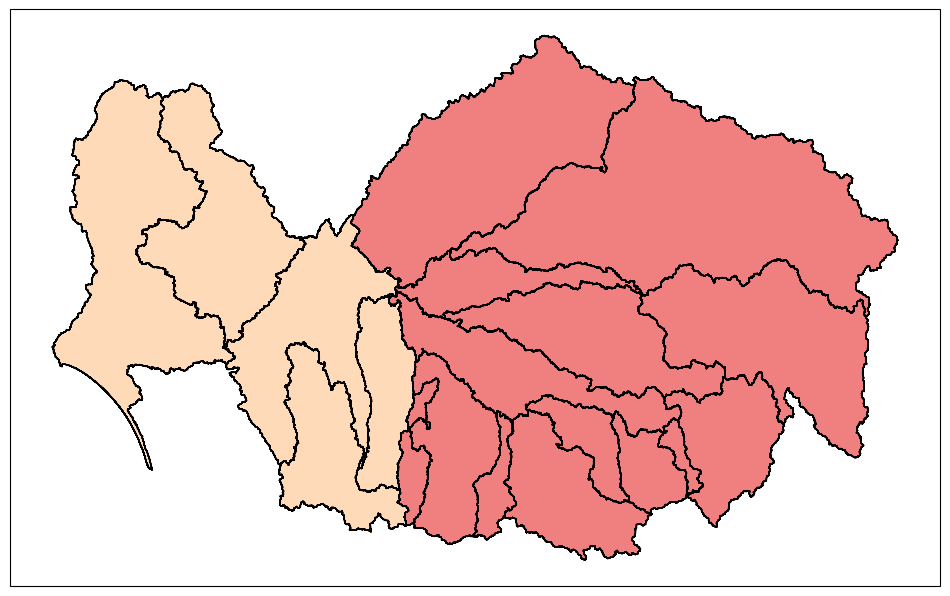

In [33]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
MDB_sub_basins_south.boundary.plot(ax=ax, color='black', linewidth=1)
MDB_sub_basins_southeast.plot(ax=ax, color = 'lightcoral', linewidth = 1)
MDB_sub_basins_southwest.plot(ax=ax, color = 'peachpuff', linewidth = 1)
plt.show()

## Map of MDB Regions

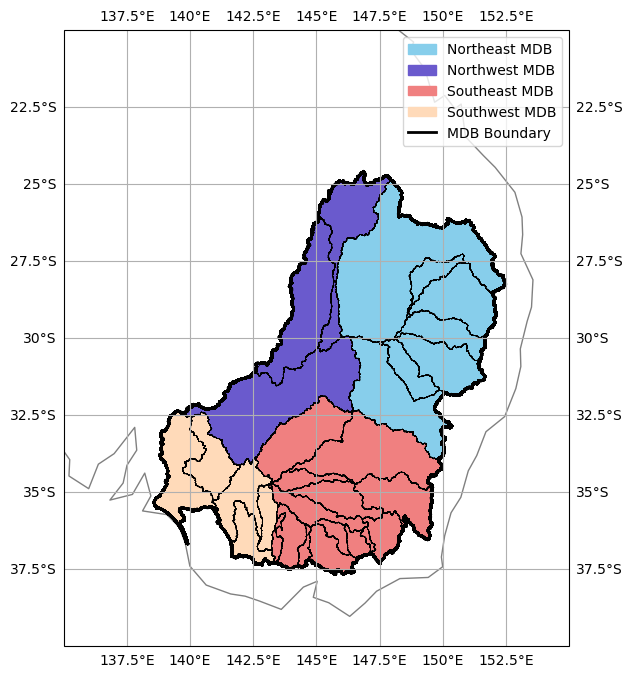

In [34]:
# Create the figure and axis with PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the MDB boundary from the sub-basin shapefile
MDB_sub_basins_region.boundary.plot(ax=ax, color='black', linewidth=2)
MDB_sub_basins.boundary.plot(ax=ax, color='black', linewidth=0.5)

MDB_sub_basins_northeast.plot(ax=ax, color = 'skyblue', linewidth = 1)
MDB_sub_basins_northwest.plot(ax=ax, color = 'slateblue', linewidth = 1)
MDB_sub_basins_southeast.plot(ax=ax, color = 'lightcoral', linewidth = 1)
MDB_sub_basins_southwest.plot(ax=ax, color = 'peachpuff', linewidth = 1)

# Add coastlines for context
ax.coastlines(resolution='110m', color='grey', linewidth=1)

# Set map extent (bounding box)
ax.set_extent([135, 155, -40, -20])

# Add gridlines with labels
ax.gridlines(draw_labels=True)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

legend_patches = [
    mpatches.Patch(color='skyblue', label='Northeast MDB'),
    mpatches.Patch(color='slateblue', label='Northwest MDB'),
    mpatches.Patch(color='lightcoral', label='Southeast MDB'),
    mpatches.Patch(color='peachpuff', label='Southwest MDB')
]
legend_lines = [
    mlines.Line2D([], [], color='black', linewidth=2, label='MDB Boundary')]

ax.legend(handles=legend_patches + legend_lines, loc='upper right')

# Show the plot
plt.show()

## Create new shapefiles for use in main code

In [35]:
MDB_sub_basins_region.to_file("MDB_Regions/MDB_Whole.shp")

In [36]:
MDB_sub_basins_northeast.to_file("MDB_Regions/MDB_Northeast_Region.shp")
MDB_sub_basins_northwest.to_file("MDB_Regions/MDB_Northwest_Region.shp")
MDB_sub_basins_southeast.to_file("MDB_Regions/MDB_Southeast_Region.shp")
MDB_sub_basins_southwest.to_file("MDB_Regions/MDB_Southwest_Region.shp")

In [37]:
NE = MDB_sub_basins_northeast.dissolve()
NW = MDB_sub_basins_northwest.dissolve()
SE = MDB_sub_basins_southeast.dissolve()
SW = MDB_sub_basins_southwest.dissolve()
MDB_regions_combined = gpd.GeoDataFrame(pd.concat([NE,NW,SE,SW], ignore_index=True))
MDB_regions_combined.to_file("MDB_Regions/MDB_Regions_Combined.shp")